In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing

In [31]:
data = pd.read_csv('train.csv')
data = data[:15]
max_clusters = 2
data['Survived'].value_counts()

0    8
1    7
Name: Survived, dtype: int64

In [32]:
data = data.drop(['Name','Ticket','Survived','Cabin'] ,1)

In [33]:
data['Pclass'].fillna(3, inplace = True) 
data['SibSp'].fillna(0, inplace = True)
data['Age'].fillna(np.mean(data['Age']),  inplace = True)  
data['Fare'].fillna(np.mean(data['Fare']), inplace = True)

In [34]:
cols = ['Sex', 'Embarked']
code = {}
def convert_it(val):
    return(code[val])
    
     

for col in cols:
    x = 0
    if (data[col].dtype == 'int64'  or  data[col].dtype == 'float64' ):
        pass
    else:
         
        vals = data[col].values.tolist()
        vals = set(vals)
        #print(vals)
        for val in vals:
            code[val] = x
            x = x + 1
        data[col] = map(convert_it, data[col] )
        
            
            

data.dropna(inplace = True)

data['Age'] = preprocessing.scale(data['Age'])
data['Fare'] = preprocessing.scale(data['Fare'])
data['Pclass'] = preprocessing.scale(data['Pclass'])
data['Sex'] = preprocessing.scale(data['Sex'])
data['SibSp'] = preprocessing.scale(data['SibSp'])
data['Parch'] = preprocessing.scale(data['Parch'])
data['Embarked'] = preprocessing.scale(data['Embarked'])

data['Sex'].value_counts()

/home/fsftn/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/fsftn/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/fsftn/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/fsftn/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/fsftn/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversio

 0.935414    8
-1.069045    7
Name: Sex, dtype: int64

7
5


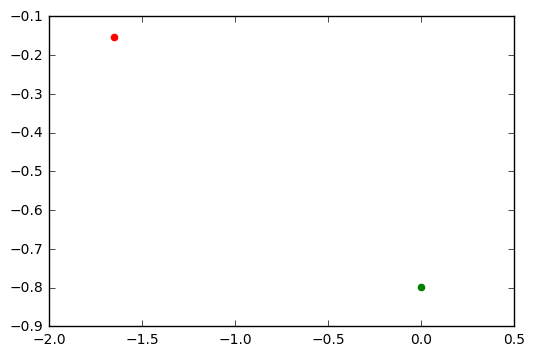

cluster locaton are
(-1.6500572946507805, -0.15179709562881991)
(0.0, -0.79718301609821762)


In [35]:
centroid_list = []
#cols = ['Pclass','Age','Sex','Fare','SibSp','Parch','Embarked']
cols = ['Age','Fare']
for i in range(max_clusters):
    
    OneDict = {}
    randomIndex  =  random.randrange(0, data.shape[0]) 
    print(randomIndex)
    
    for col in cols:
        
        OneDict[col] = data.iloc[randomIndex][col]
        
    centroid_list.append(OneDict)
#plt.scatter(2,3)

 

'''
centroid_list[0]['Age'] = 38
centroid_list[0]['Fare'] = 71 
centroid_list[1]['Age'] = 2
centroid_list[1]['Fare'] = 21 
'''

p1_1 = centroid_list[0]['Age']
p1_2 = centroid_list[0]['Fare']

p2_1 = centroid_list[1]['Age']
p2_2 = centroid_list[1]['Fare']

#print p1,p2
plt.scatter(p1_1,p1_2,color = 'red')
plt.scatter(p2_1,p2_2,color = 'green')

plt.show()

print('cluster locaton are')
print(p1_1, p1_2)
print(p2_1, p2_2)


cluster locaton are
(-1.6500572946507805, -0.15179709562881991)
(0.0, -0.79718301609821762)
iteration----->  0


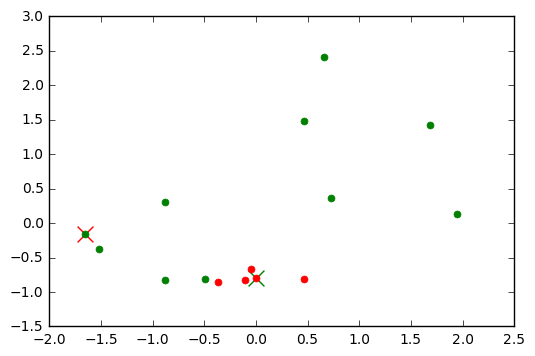

for centroid pt 0
count =  5
for centroid pt 1
count =  10
iteration----->  1


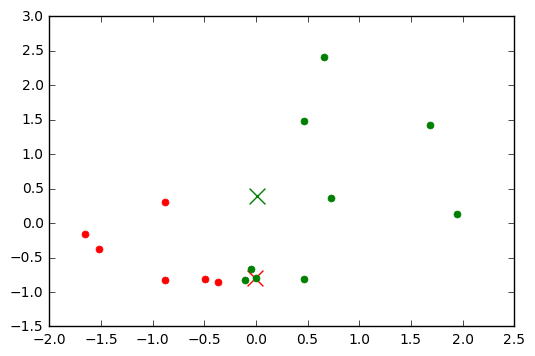

for centroid pt 0
count =  6
for centroid pt 1
count =  9
iteration----->  2


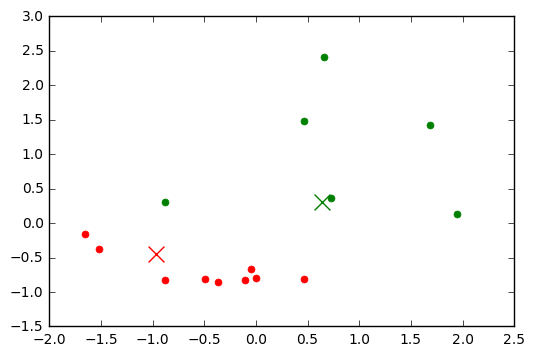

for centroid pt 0
count =  9
for centroid pt 1
count =  6
iteration----->  3


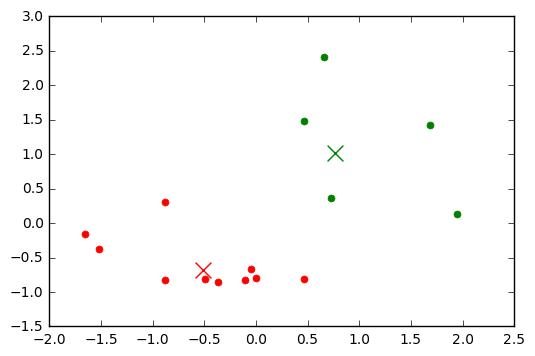

for centroid pt 0
count =  10
for centroid pt 1
count =  5
iteration----->  4


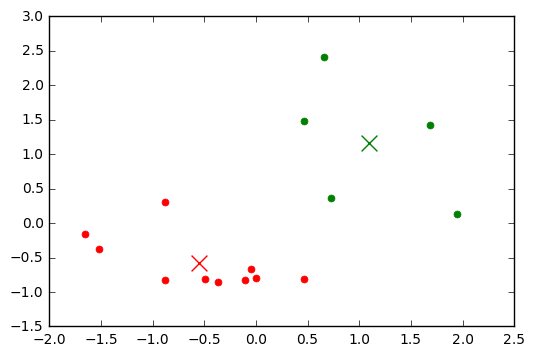

for centroid pt 0
count =  10
for centroid pt 1
count =  5
iteration----->  5


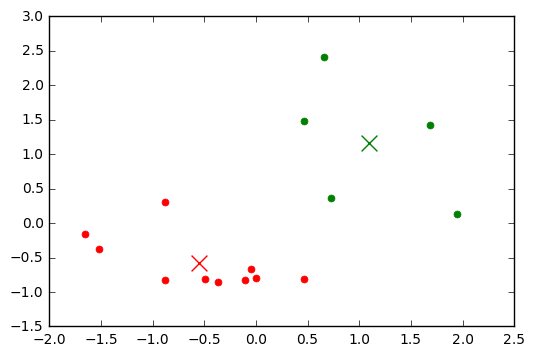

for centroid pt 0
count =  10
for centroid pt 1
count =  5
iteration----->  6


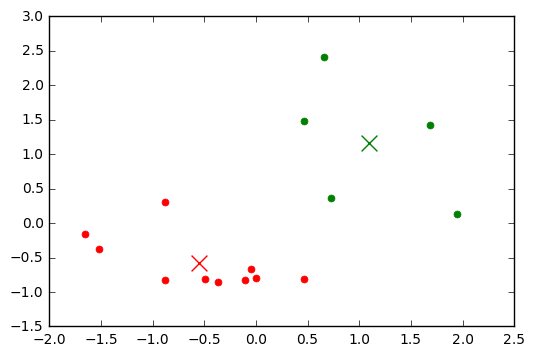

for centroid pt 0
count =  10
for centroid pt 1
count =  5


In [36]:
cluster_train = [2]*data.shape[0]
max_iter =  7
iters =  0


print('cluster locaton are')
print(p1_1, p1_2)
print(p2_1, p2_2)

while iters < max_iter:
    
    print 'iteration-----> ',iters
    for i in range(data.shape[0]):
        #print('i is ', i)
        # step 1 begins:
        cluster_index =  0
        mini = 9999
        for centroid in centroid_list:
            
            dist = np.linalg.norm(centroid.values() - data[cols].iloc[i])
            #print 'dist for centroid', cluster_index, 'is' , dist
            if dist < mini:
                #print('changed')
                mini = dist 
                cluster_train[i] = cluster_index
            cluster_index += 1
    #now plot
    colours  = ["r.", "g."]
    for i in range(data.shape[0]):
        plt.plot(data['Age'].iloc[i], data['Fare'].iloc[i],  colours[cluster_train[i]], markersize = 10)
    
    
    p1_1 = centroid_list[0]['Age']
    p1_2 = centroid_list[0]['Fare']
    p2_1 = centroid_list[1]['Age']
    p2_2 = centroid_list[1]['Fare']
    plt.scatter(p1_1,p1_2, color = 'red',marker  = 'x',s = 130)
    plt.scatter(p2_1,p2_2, color = 'green',marker = 'x',s =130)
    plt.show()
    #step 2 
        
    for ind in range(len(centroid_list)):
        print 'for centroid pt',ind
        SumCentroidPt = {}
        count  = 0
        for col in cols  :
                SumCentroidPt[col] =  0 
        for i in range(data.shape[0]):
            if(cluster_train[i] == ind):
                count = count + 1 
                for col in cols:
                    SumCentroidPt[col] = SumCentroidPt[col] + data.iloc[i][col]
            
        print 'count = ',count
                
                
        for col in cols:
            SumCentroidPt[col] =  SumCentroidPt[col]/count 
        centroid_list[ind] = SumCentroidPt
                
    iters += 1


In [37]:
#now for fitting new data just repeat step 1 

In [38]:
centroid_list

[{'Age': -0.54818570122287047, 'Fare': -0.58242302076965302},
 {'Age': 1.0963714024457407, 'Fare': 1.1648460415393065}]

In [40]:
cluster_train.count(0)

10

In [45]:
from sklearn.cluster import KMeans
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.682288,-1.069045,-0.366679,0.50,-0.459279,-0.858992,-0.150756
1,2,-1.592006,0.935414,0.660023,0.50,-0.459279,2.416523,2.110579
2,3,0.682288,0.935414,-0.110004,-0.75,-0.459279,-0.824463,-0.150756
3,4,-1.592006,0.935414,0.467516,0.50,-0.459279,1.486388,-0.150756
4,5,0.682288,-1.069045,0.467516,-0.75,-0.459279,-0.818069,-0.150756
5,6,0.682288,-1.069045,0.000000,-0.75,-0.459279,-0.797183,-2.412091
6,7,-1.592006,-1.069045,1.686725,-0.75,-0.459279,1.423085,-0.150756
7,8,0.682288,-1.069045,-1.650057,3.00,0.306186,-0.151797,-0.150756
8,9,0.682288,0.935414,-0.045835,-0.75,1.071652,-0.660348,-0.150756
9,10,-0.454859,0.935414,-0.880031,0.50,-0.459279,0.308368,2.110579


In [42]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

In [43]:
kmeans

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)

In [44]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
kmeans.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [29]:
kmeans.cluster_centers_

array([[  3.30000000e+01,  -1.35495151e-01,   1.91273014e-01,
         -3.24890243e-02,   8.25801028e-02,   5.24222434e-02,
          2.45243994e-02,  -2.01251652e-02],
       [  9.80000000e+01,   1.35495151e-01,  -1.91273014e-01,
          3.24890243e-02,  -8.25801028e-02,  -5.24222434e-02,
         -2.45243994e-02,   2.01251652e-02]])